Found 45 images belonging to 3 classes.
Found 15 images belonging to 3 classes.
Epoch 1/50
15/15 [==============================] - 1s 49ms/step - loss: 1.0824 - acc: 0.6000 - val_loss: 0.6227 - val_acc: 0.9333
Epoch 2/50
15/15 [==============================] - 0s 24ms/step - loss: 0.2363 - acc: 0.9556 - val_loss: 0.0763 - val_acc: 1.0000
Epoch 3/50
15/15 [==============================] - 0s 24ms/step - loss: 0.0136 - acc: 1.0000 - val_loss: 0.0216 - val_acc: 1.0000
Epoch 4/50
15/15 [==============================] - 0s 22ms/step - loss: 9.5906e-04 - acc: 1.0000 - val_loss: 0.0087 - val_acc: 1.0000
Epoch 5/50
15/15 [==============================] - 0s 26ms/step - loss: 4.2033e-04 - acc: 1.0000 - val_loss: 0.0073 - val_acc: 1.0000
Epoch 6/50
15/15 [==============================] - 0s 29ms/step - loss: 2.8562e-04 - acc: 1.0000 - val_loss: 0.0069 - val_acc: 1.0000
Epoch 7/50
15/15 [==============================] - 0s 25ms/step - loss: 2.4041e-04 - acc: 1.0000 - val_loss: 0.0070 - val

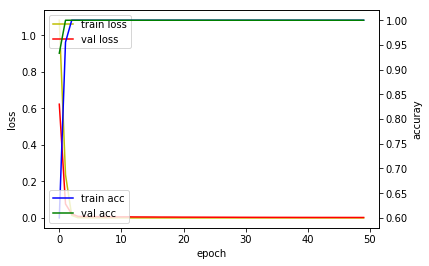

In [17]:
# 0. 사용할 패키지 불러오기
%matplotlib inline
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

from __future__ import print_function
from keras.utils.vis_utils import model_to_dot
from keras.models import Model
from keras.layers import Input
import keras
import matplotlib.pyplot as plt


from matplotlib import pyplot

import pandas as pd


# 랜덤시드 고정시키기
np.random.seed(3)

# 1. 데이터 생성하기
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'handwriting_shape/train',
        target_size=(24, 24),
        batch_size=3,
        class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        'handwriting_shape/test',
        target_size=(24, 24),    
        batch_size=3,
        class_mode='categorical')

# 2. 모델 구성하기
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(24,24,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. 모델 학습시키기
tb_hist= keras.callbacks.TensorBoard(log_dir='./graph', histogram_freq=0, write_graph=True, write_images=True)
hist= model.fit_generator(
        train_generator,
        steps_per_epoch=15,
        epochs=50,
        validation_data=test_generator,
        validation_steps=5,
        callbacks=[tb_hist])

# 5. 모델 평가하기
print("-- Evaluate --")
scores = model.evaluate_generator(test_generator, steps=5)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))


# 6. 모델 사용하기
print("-- Predict --")
output = model.predict_generator(test_generator, steps=5)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(test_generator.class_indices)
print(test_generator.index_array)
print(output)
print(test_generator.filenames)


fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()